In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.layers import Reshape
from keras.utils import to_categorical
from keras.layers import Embedding

In [2]:
#Read dataset
df=pd.read_csv('40_percentage_of_each_dataset.csv')

In [3]:
df

,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1.478200e+09,0,0,0,0,0,0,0,0,0,Dos
1,1.478201e+09,305,27,128,0,0,63,127,14,166,R
2,1.478199e+09,161,128,137,0,0,36,0,0,0,R
3,1.478200e+09,608,24,33,34,48,8,143,112,5,R
4,1.478201e+09,704,20,0,0,0,0,0,0,0,R
...,...,...,...,...,...,...,...,...,...,...,...
6547405,1.478192e+09,790,69,41,36,255,41,36,0,255,RPM
6547406,1.478192e+09,790,69,41,36,255,41,36,0,255,RPM
6547407,1.478192e+09,790,69,41,36,255,41,36,0,255,RPM
6547408,1.478192e+09,1088,255,0,0,0,255,131,9,0,R


In [4]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df.Label.value_counts()

R        5614661
RPM       261724
gear      239051
Dos       235279
Fuzzy     196695
Name: Label, dtype: int64

In [5]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = MinMaxScaler() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [7]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='Dos'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [8]:
# Generate 9*9 color images for class 0 (Normal)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):  
     count=count+1
     if count<=27: 
         im=df0.iloc[i].values
         ims=np.append(ims,im)
     else:
         ims=np.array(ims)
         array = np.array(ims, dtype=np.uint8)
         new_image = Image.fromarray(array)
         new_image.save(image_path+str(i)+'.png')
         count=0
         ims = []

In [9]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=24: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [10]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=24: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [11]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):  
    count=count+1
    if count<=24: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [12]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "train/4/"
os.makedirs(image_path)


for i in range(0, len(df4)):  
    count=count+1
    if count<=24: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

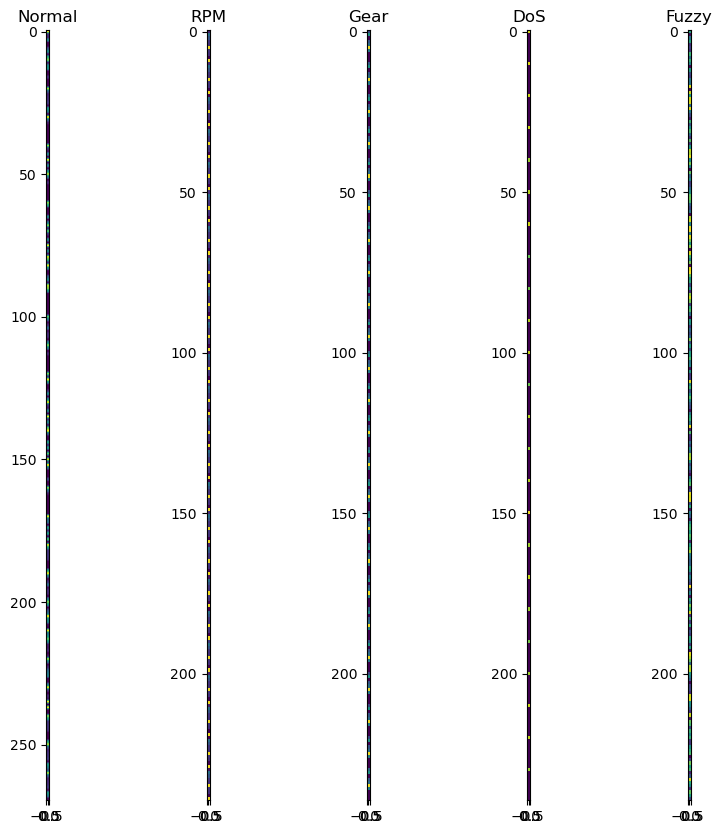

In [13]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train/0/27.png')
img2 = Image.open('./train/1/24.png')
img3 = Image.open('./train/2/24.png')
img4 = Image.open('./train/3/24.png')
img5 = Image.open('./train/4/24.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy")
plt.show()  # display it

In [14]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

237831


In [15]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
#         print ("%s not exist!"%(srcfile))
        pass
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [16]:
# The size of test set
Numbers

47566

In [17]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [18]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [19]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [20]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [21]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D, Conv1D, MaxPooling1D, MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.layers import BatchNormalization
# from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg19 import VGG19
# from keras.applications.resnet50 import  ResNet50
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
# from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [22]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 190269 images belonging to 5 classes.
Found 47586 images belonging to 5 classes.


In [23]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [24]:
history_this= LossHistory()

In [25]:
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Reshape
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, MaxPooling1D
from keras.layers import BatchNormalization

def hydl_model(num_class, epochs, history=history_this, input_shape=INPUT_SIZE):
    # Define the input layer
    input_layer = Input(shape=input_shape)
    
    # Define the CNN layer
    cnn_layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
    # A hidden layer the output.
    #x = keras.layers.Conv2D(filters, kernel_size, strides, padding, ...)(x)
    # BN layer is between output of a layer and it's activation.
    cnn_layer = keras.layers.BatchNormalization()(cnn_layer)

    cnn_layer = MaxPooling2D(pool_size=(2, 2))(cnn_layer) #maxpooling
    #cnn_layer = Conv2D(64, kernel_size=(3, 3), activation='relu')(cnn_layer)
    cnn_layer = Dropout(0.20)(cnn_layer) #dropout
    cnn_layer = Conv2D(64, kernel_size=(3, 3), activation='relu')(cnn_layer)
    cnn_layer = keras.layers.BatchNormalization()(cnn_layer)
    cnn_layer = MaxPooling2D(pool_size=(2, 2))(cnn_layer) #maxpooling
    cnn_layer = Dropout(0.20)(cnn_layer) #dropout
    
     # Define the reshape layer
    #gap_layer = MaxPooling2D()(cnn_layer)
    gap_layer = GlobalAveragePooling2D()(cnn_layer)
    reshape_layer = Reshape((1, 64))(gap_layer)
    
    lstm_layer = LSTM(128, activation='tanh')(reshape_layer)
    flatten_layer = Flatten()(lstm_layer)
    output_layer = Dense(num_class, activation='sigmoid')(flatten_layer)
    dropout = Dropout(0.20)(output_layer)
    output_layer1 = Dense(num_class, activation = 'sigmoid')(dropout)
    #lstm_layer = Dropout(0.25)(lstm_layer)
    
    # Define the Flatten layer
    #flatten_layer = Flatten()(cnn_layer)
    
    # Define the reshape layer
    #gap_layer = GlobalAveragePooling2D()(cnn_layer)
    #reshape_layer = Reshape((1, 64))(gap_layer)

    # Define the LSTM layer
    #lstm_layer = LSTM(64, activation='relu')(reshape_layer)
    #lstm_layer = Dropout(0.25)(lstm_layer)
    
    # Define the output layer
    #output_layer = Dense(num_class, activation='softmax')(lstm_layer)
    
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Define the early stopping and model checkpoint callbacks
    early_stopping =kcallbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="./model", save_weights_only=True,
                                       monitor='val_accuracy', mode='max', save_best_only=True)
    
    # Train the model
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping, model_checkpoint, history]
    )

    model.save("hydl_model.h5")
    model.summary()
    return history


In [26]:
import time
t1 = time.time()
hybrid_history = hydl_model(num_class=5,epochs=10) #tf36cnn
t2 = time.time()
print('The training time is :%f seconds' % (t2-t1))


Epoch 1/10
1487/1487 [==============================] - 3973s 3s/step - loss: 0.0100 - accuracy: 0.9942 - val_loss: 0.0130 - val_accuracy: 0.9997
Epoch 2/10
1487/1487 [==============================] - 3828s 3s/step - loss: 1.5249e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9997
Epoch 3/10
1487/1487 [==============================] - 3908s 3s/step - loss: 1.0227e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 4/10
1487/1487 [==============================] - 3847s 3s/step - loss: 8.2090e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 5/10
1487/1487 [==============================] - 3882s 3s/step - loss: 7.6750e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 6/10
1487/1487 [==============================] - 3854s 3s/step - loss: 7.6054e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 7/10
1487/1487 [==============================] - 3876s 3s/step - loss: 7.3361e-05 - accuracy: 1.0